# Salary Predictions of Data Professions

<b>Why is salary prediction important?</b>

Salaries in the field of data professions vary widely based on factors such as experience, job role, and performance. Accurately predicting salaries for data professionals is essential for both job seekers and employers.

In the current generation, salary prediction is crucial for both employers and employees as a lot of regular employees rely mostly on it for motivation. It helps employers and employees to make estimations of the expected salary.


My task is to build a predictive machine-learning model that can be used for predicting the salaries of data professionals.

### Importing the libraries and the dataset

In [187]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings

warnings.filterwarnings('ignore')

In [189]:
#Reading the data file
dataset=pd.read_csv("Salary Prediction of Data Professions.csv")

#head() function is used to retrive the first n rows. Default n=5. 
dataset.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [190]:
#information about the columns of the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB
None


<b> Data Cleaning

Every dataset can contain dirty,null,unnecessary,corrupt values. Therefore, before proceeding with the computation,
cleaning or cleansing of the data is essential. Data Cleaning or Data Cleansing is the process of removing corrupt or 
inaccurate entries from the dataset. 

In [11]:
#checking for null values in the dataset
dataset.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [191]:
#Since there are hardly any null values in the dataset, we could simply remove the null values for further analysis
dataset.dropna(inplace=True)

#Remove duplicate values if any
dataset.drop_duplicates(inplace=True)
dataset.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [192]:
#For salary prediction, the names are not important, thus removing both First name and Last name column
dataset=dataset.drop(['FIRST NAME', 'LAST NAME'], axis=1)
dataset

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
6,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
8,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2634,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


### Exploratory Data Analysis (EDA)

Exploratory Data Analysis is a method of systematically going through the data, computing summary statistics and finding the relationships between all the variables. 

In [193]:
#.dtypes return the data type of each column
dataset.dtypes

SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

<b> Summary Statistics</b>

Once the data is cleaned, we need to understand the statistics of the data. Statistical Analysis tells us about the data. 
Statistical knowledge helps you to employ the correct analyses and effectively present the results.

In [200]:
#Descriptive Statistics of the dataset
dataset.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000
mean,24.725506,58055.764777,22.490688,7.509312,3.482186,1.555870
std,3.908838,36776.484770,4.597236,4.597236,1.115217,2.703656
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43401.250000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46737.500000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,50323.750000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


<b> Average Salary Earned by Each Gender

SEX
M    57082.08
F    58998.42
Name: SALARY, dtype: float64


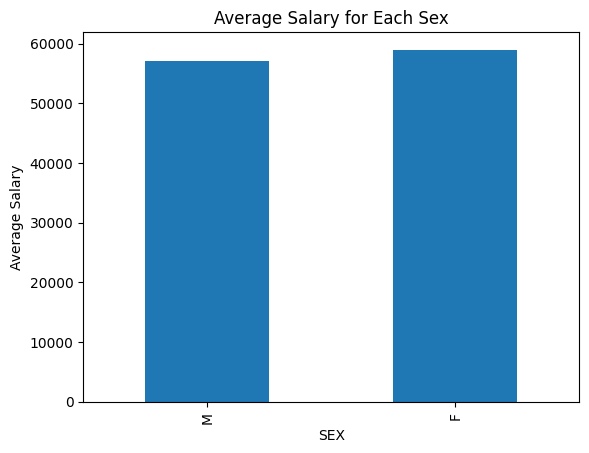

In [201]:
avgSalaryPerSex=dataset.groupby('SEX')['SALARY'].mean().round(2).sort_values(ascending=True)
print(avgSalaryPerSex)
avgSalaryPerSex.plot(kind='bar')
plt.title("Average Salary for Each Sex")
plt.ylabel("Average Salary")
plt.show()

There is no much of a difference between the average salary earned by Male and Female employees.

<b> Average Salary Earned by Different Designation

DESIGNATION
Analyst            45028.62
Senior Analyst     59956.56
Associate          87074.88
Manager           126012.62
Senior Manager    178785.62
Director          294784.56
Name: SALARY, dtype: float64


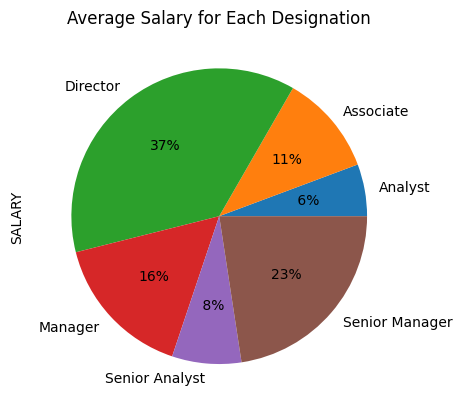

In [202]:
print(dataset.groupby('DESIGNATION')['SALARY'].mean().round(2).sort_values(ascending=True))
dataset.groupby('DESIGNATION')['SALARY'].mean().plot.pie(autopct="%2.0f%%",subplots=True)
plt.title("Average Salary for Each Designation")
plt.show()

There is a difference in the average salary earned by different designation. An analyst has an average salary of about 45028.62 whereas a Director earns about 294784.56. 

<b> Average Salary Earned by Different Units

UNIT
Operations    55550.00
Web           57158.69
Finance       58130.89
Management    59063.95
IT            59182.72
Marketing     59212.69
Name: SALARY, dtype: float64


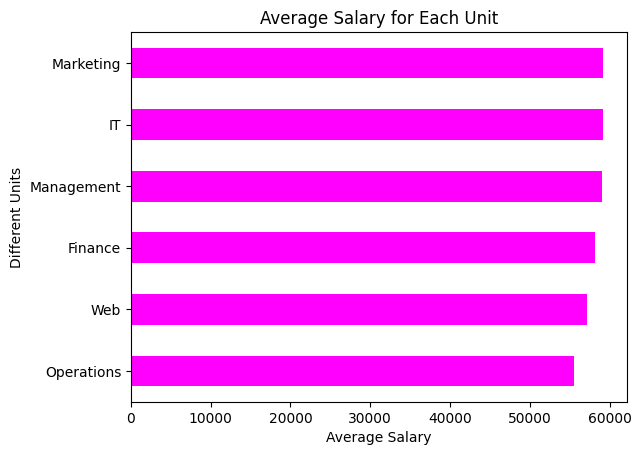

In [197]:
avgSalaryPerSex=dataset.groupby('UNIT')['SALARY'].mean().round(2).sort_values(ascending=True)
print(avgSalaryPerSex)
avgSalaryPerSex.plot(kind='barh', color='magenta')
plt.title("Average Salary for Each Unit")
plt.xlabel("Average Salary")
plt.ylabel("Different Units")
plt.show()

There is no much of a difference between the average salary earned by different units of the organisation.

<b> Average Salary Earned by Employees based on past experiences

ExpGroup
0-5       48915.32
5-10     108895.13
10-15    194492.51
20-25    253284.00
15-20    273644.19
Name: SALARY, dtype: float64


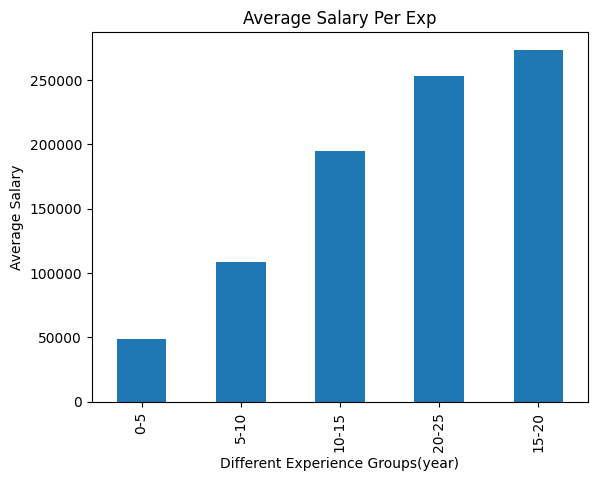

In [207]:
dataset['ExpGroup']=dataset['PAST EXP'].apply(lambda x: '0-5' if 0<=x<5 else '5-10'if 5<=x<10 else '10-15'if 10<=x<15 else '15-20'if 15<=x<20 else '20-25')


avgSalaryPerExp=dataset.groupby('ExpGroup')['SALARY'].mean().round(2).sort_values(ascending=True)
print(avgSalaryPerExp)
avgSalaryPerExp.plot(kind='bar')
plt.ylabel("Average Salary")
plt.xlabel("Different Experience Groups(year)")
plt.title("Average Salary Per Exp")
plt.show()

As an when the years of past experience increases, an employee might be getting higher and higher salary.

<b> Average Salary Earned by Employees based on the age group

AgeGroup
20-30     48351.49
30-40    127889.48
40-45    291668.43
Name: SALARY, dtype: float64


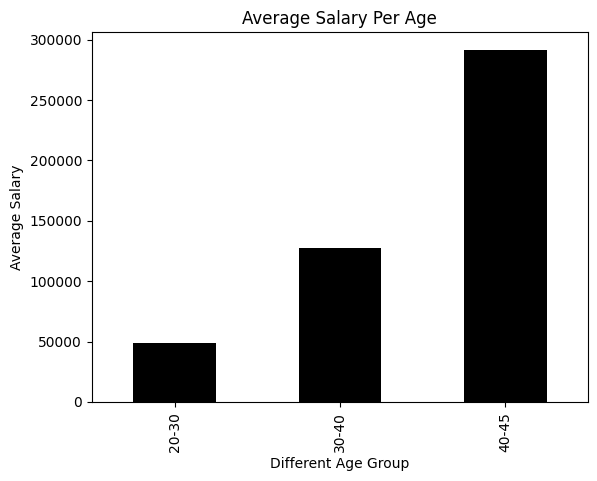

In [208]:
dataset['AgeGroup']=dataset['AGE'].apply(lambda x: '20-30' if 20<=x<30 else '30-40'if 30<=x<40 else '40-45')

avgSalaryPerAge=dataset.groupby('AgeGroup')['SALARY'].mean().round(2).sort_values(ascending=True)
print(avgSalaryPerAge)
avgSalaryPerAge.plot(kind='bar',color='black')
plt.ylabel("Average Salary")
plt.xlabel("Different Age Group")
plt.title("Average Salary Per Age")
plt.show()

As an when the age of an employee increases, an employee might be getting higher and higher salary.

Finding correlation between different variables.
<br>+1 means Postive correlation. It means if one of the values increases, then the other value will increase. 
<br>-1 means Negative correlation. It means if one of the values increases, then the other value will decrease. 
<br>0 means no correlation

In [135]:
dataset.corr()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
AGE,1.000000,0.869357,0.004794,-0.004794,0.033534,0.903694
SALARY,0.869357,1.000000,0.004596,-0.004596,0.016123,0.851026
LEAVES USED,0.004794,0.004596,1.000000,-1.000000,0.004866,0.003854
LEAVES REMAINING,-0.004794,-0.004596,-1.000000,1.000000,-0.004866,-0.003854
RATINGS,0.033534,0.016123,0.004866,-0.004866,1.000000,0.036397
PAST EXP,0.903694,0.851026,0.003854,-0.003854,0.036397,1.000000


### Feature Engineering

In [204]:
#Converting the columns DOJ and Current Date to date format
dataset['DOJ']=pd.to_datetime(dataset["DOJ"])
dataset['CURRENT DATE']=pd.to_datetime(dataset["CURRENT DATE"])


#Adding a new column to check how many days an employee has worked in the current company
dataset['Tenure']=(dataset['CURRENT DATE']-dataset['DOJ'])
dataset['Tenure']=round((dataset['Tenure'].dt.days/365),1)

In [205]:
#Converting every Designation to a numerical format
designationDict={'Analyst': 0,'Senior Analyst':1,'Associate':2,'Manager':3, 'Senior Manager':4,'Director':5}
dataset['DESIGNATION']=dataset['DESIGNATION'].map(designationDict)

In [209]:
#Dropping the variables which have least correlation or which does not make much of a difference in the salaries.

dataset=dataset.drop(['DOJ','CURRENT DATE','SEX','UNIT','AgeGroup','ExpGroup','LEAVES USED','LEAVES REMAINING'],axis=1)
dataset

,DESIGNATION,AGE,SALARY,RATINGS,PAST EXP,Tenure
0,0,21.0,44570,2.0,0,1.6
2,0,21.0,40955,3.0,0,1.4
3,0,22.0,45550,3.0,0,2.8
6,0,22.0,40339,5.0,0,2.3
8,1,28.0,63478,3.0,1,1.5
...,...,...,...,...,...,...
2634,4,36.0,185977,5.0,10,4.5
2635,0,23.0,45758,2.0,0,2.0
2636,0,21.0,47315,5.0,0,2.0
2637,0,24.0,45172,3.0,1,1.8


### Model Building

In [210]:
#Splitting the data into feature and target variable x = feature columns and y=target variable
x1=dataset.iloc[:,0:2]
x2=dataset.iloc[:,3:6]
x=pd.concat([x1,x2],axis=1)
y=dataset['SALARY']

x

,DESIGNATION,AGE,RATINGS,PAST EXP,Tenure
0,0,21.0,2.0,0,1.6
2,0,21.0,3.0,0,1.4
3,0,22.0,3.0,0,2.8
6,0,22.0,5.0,0,2.3
8,1,28.0,3.0,1,1.5
...,...,...,...,...,...
2634,4,36.0,5.0,10,4.5
2635,0,23.0,2.0,0,2.0
2636,0,21.0,5.0,0,2.0
2637,0,24.0,3.0,1,1.8


In [211]:
#Splitting the data into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [212]:
#CReating a regression model function
def regressionModels(regressionModel,x,y,paramGrid):
  regression_model=[]
  mse=[]
  rmse=[]
  mae=[]
  r2=[]
  mseModel=[]
  rmseModel=[]
  maeModel=[]
  r2Model=[]

  kf = KFold(n_splits=3, shuffle=True, random_state=1)   #KFold Validation
  regression_model.append(regressionModel)
  grid=GridSearchCV(estimator=regressionModel,param_grid=paramGrid,cv=5,verbose=2)   #Hyperparameter Tuning with GridSearchCV

  #Splitting the data into training and testing based on k=3 folds
  for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.fit_transform(X_test)
    grid.fit(X_train,y_train)
    gridPred=grid.predict(X_test)

    #Calculating the metrics for each fold
    mse.append(mean_squared_error(y_test, gridPred, squared=False))
    rmse.append(mean_squared_error(y_test, gridPred))
    mae.append(mean_absolute_error(y_test, gridPred))
    r2.append(r2_score(y_test, gridPred))

  #Averaging the metrics score of all the folds.
  mseModel.append(sum(mse) / len(mse))
  rmseModel.append(sum(rmse) / len(rmse))
  maeModel.append(sum(mae) / len(mae))
  r2Model.append(sum(r2) / len(r2))

  #CReating a new dataframe to store the scores
  df = pd.DataFrame({'Regression Model' : regression_model, 'Mean Square Error': mseModel, 'Root Mean Square Error': rmseModel,'Mean Absolute Error': maeModel,'R2-Square Value': r2Model})
  df = df.reset_index(drop=True)
  return df

Applying Linear Regression

In [213]:
linear = LinearRegression()
linear_param_grid={
    'n_jobs':[1,2,3,4,5]
}
linear=regressionModels(linear,x,y, linear_param_grid)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...........................................n_jobs=1; total time=   1.6s
[CV] END ...........................................n_jobs=1; total time=   0.0s
[CV] END ...........................................n_jobs=1; total time=   0.0s
[CV] END ...........................................n_jobs=1; total time=   0.0s
[CV] END ...........................................n_jobs=1; total time=   0.0s
[CV] END ...........................................n_jobs=2; total time=   0.0s
[CV] END ...........................................n_jobs=2; total time=   0.0s
[CV] END ...........................................n_jobs=2; total time=   0.0s
[CV] END ...........................................n_jobs=2; total time=   0.0s
[CV] END ...........................................n_jobs=2; total time=   0.0s
[CV] END ...........................................n_jobs=3; total time=   0.0s
[CV] END ........................................

Random Forest Regressor

In [216]:
rf = RandomForestRegressor()
rf_param_grid={
    'max_depth':[3,5],
    'criterion':['squared_error','absolute_error','friedman_mse','poisson']

}
rfRegressor=regressionModels(rf,x,y, rf_param_grid)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............criterion=squared_error, max_depth=3; total time=   0.7s
[CV] END ...............criterion=squared_error, max_depth=3; total time=   0.3s
[CV] END ...............criterion=squared_error, max_depth=3; total time=   0.4s
[CV] END ...............criterion=squared_error, max_depth=3; total time=   0.3s
[CV] END ...............criterion=squared_error, max_depth=3; total time=   0.3s
[CV] END ...............criterion=squared_error, max_depth=5; total time=   0.4s
[CV] END ...............criterion=squared_error, max_depth=5; total time=   0.4s
[CV] END ...............criterion=squared_error, max_depth=5; total time=   0.4s
[CV] END ...............criterion=squared_error, max_depth=5; total time=   0.4s
[CV] END ...............criterion=squared_error, max_depth=5; total time=   0.4s
[CV] END ..............criterion=absolute_error, max_depth=3; total time=   4.5s
[CV] END ..............criterion=absolute_error, 

[CV] END ..............criterion=absolute_error, max_depth=5; total time=   5.9s
[CV] END ................criterion=friedman_mse, max_depth=3; total time=   0.3s
[CV] END ................criterion=friedman_mse, max_depth=3; total time=   0.3s
[CV] END ................criterion=friedman_mse, max_depth=3; total time=   0.3s
[CV] END ................criterion=friedman_mse, max_depth=3; total time=   0.3s
[CV] END ................criterion=friedman_mse, max_depth=3; total time=   0.3s
[CV] END ................criterion=friedman_mse, max_depth=5; total time=   0.4s
[CV] END ................criterion=friedman_mse, max_depth=5; total time=   0.4s
[CV] END ................criterion=friedman_mse, max_depth=5; total time=   0.4s
[CV] END ................criterion=friedman_mse, max_depth=5; total time=   0.4s
[CV] END ................criterion=friedman_mse, max_depth=5; total time=   0.4s
[CV] END .....................criterion=poisson, max_depth=3; total time=   0.4s
[CV] END ...................

Decision Tree Regressor

In [214]:
dt = DecisionTreeRegressor()
rt_param_grid={
    'max_depth':[3,5],
    'criterion':['squared_error','absolute_error','friedman_mse','poisson']

}
dtRegressor=regressionModels(dt,x,y, rt_param_grid)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............criterion=squared_error, max_depth=3; total time=   0.6s
[CV] END ...............criterion=squared_error, max_depth=3; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=3; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=3; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=3; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=5; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=5; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=5; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=5; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=5; total time=   0.0s
[CV] END ..............criterion=absolute_error, max_depth=3; total time=   0.1s
[CV] END ..............criterion=absolute_error, 

[CV] END ..............criterion=absolute_error, max_depth=5; total time=   0.0s
[CV] END ................criterion=friedman_mse, max_depth=3; total time=   0.0s
[CV] END ................criterion=friedman_mse, max_depth=3; total time=   0.0s
[CV] END ................criterion=friedman_mse, max_depth=3; total time=   0.0s
[CV] END ................criterion=friedman_mse, max_depth=3; total time=   0.0s
[CV] END ................criterion=friedman_mse, max_depth=3; total time=   0.0s
[CV] END ................criterion=friedman_mse, max_depth=5; total time=   0.0s
[CV] END ................criterion=friedman_mse, max_depth=5; total time=   0.0s
[CV] END ................criterion=friedman_mse, max_depth=5; total time=   0.0s
[CV] END ................criterion=friedman_mse, max_depth=5; total time=   0.0s
[CV] END ................criterion=friedman_mse, max_depth=5; total time=   0.0s
[CV] END .....................criterion=poisson, max_depth=3; total time=   0.0s
[CV] END ...................

Gradient Boosting

In [215]:
gb = GradientBoostingRegressor()
gb_param_grid={
    "max_depth": [4,5],
    "learning_rate": [0.01,0.005]
}
gbRegressor=regressionModels(gb,x,y, gb_param_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................learning_rate=0.01, max_depth=4; total time=   0.9s
[CV] END ....................learning_rate=0.01, max_depth=4; total time=   0.2s
[CV] END ....................learning_rate=0.01, max_depth=4; total time=   0.3s
[CV] END ....................learning_rate=0.01, max_depth=4; total time=   0.3s
[CV] END ....................learning_rate=0.01, max_depth=4; total time=   0.3s
[CV] END ....................learning_rate=0.01, max_depth=5; total time=   0.6s
[CV] END ....................learning_rate=0.01, max_depth=5; total time=   0.5s
[CV] END ....................learning_rate=0.01, max_depth=5; total time=   0.3s
[CV] END ....................learning_rate=0.01, max_depth=5; total time=   0.4s
[CV] END ....................learning_rate=0.01, max_depth=5; total time=   0.4s
[CV] END ...................learning_rate=0.005, max_depth=4; total time=   0.3s
[CV] END ...................learning_rate=0.005, 

In [217]:
df1=pd.concat([linear,rfRegressor,dtRegressor,gbRegressor], axis=0)
df1.reset_index(drop=True)

,Regression Model,Mean Square Error,Root Mean Square Error,Mean Absolute Error,R2-Square Value
0,LinearRegression(),14472.853926,2.169740e+08,7217.555970,0.838950
1,RandomForestRegressor(),9168.655732,8.565024e+07,4503.813139,0.933649
2,DecisionTreeRegressor(),10735.565099,1.216656e+08,4644.369005,0.902644
3,GradientBoostingRegressor(),15368.518081,2.434606e+08,7777.364042,0.823994


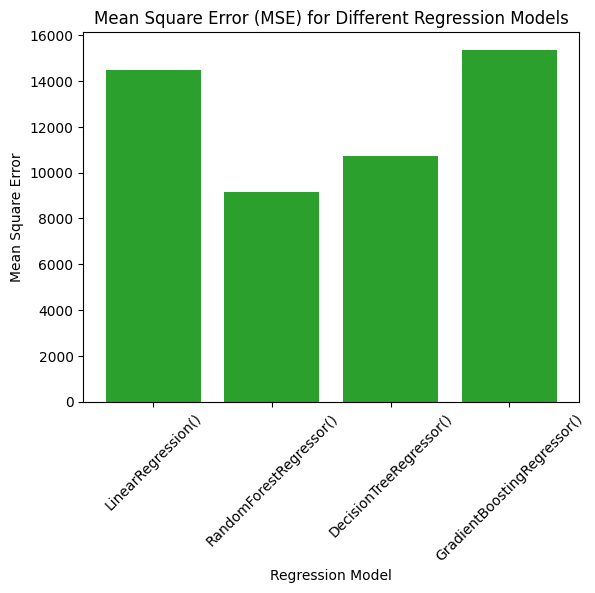

In [218]:
models = df1['Regression Model']
mse_values = df1['Mean Square Error']
rmse_values = df1['Root Mean Square Error']
mae_values = df1['Mean Absolute Error']
r2_values = df1['R2-Square Value']

x_indices = np.arange(len(models))

# Plotting MSE
plt.bar(x_indices, mse_values, color='tab:green')
plt.title('Mean Square Error (MSE) for Different Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('Mean Square Error')
plt.xticks(x_indices, models, rotation=45)
plt.show()

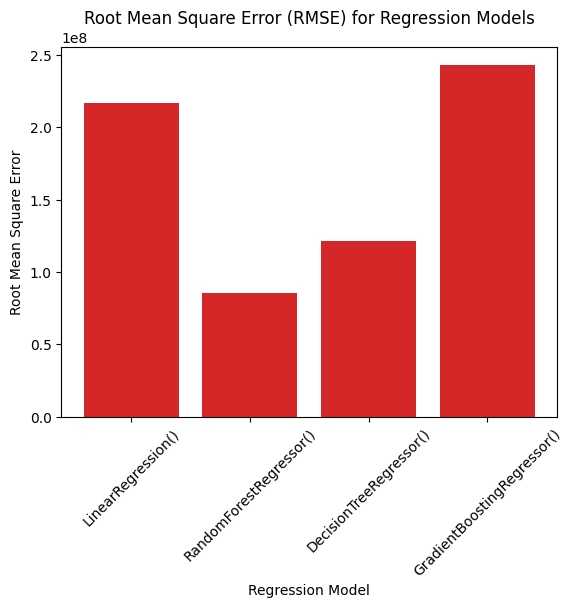

In [219]:
# Plotting RMSE
plt.bar(x_indices, rmse_values, color='tab:red')
plt.title('Root Mean Square Error (RMSE) for Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('Root Mean Square Error')
plt.xticks(x_indices, models, rotation=45)
plt.show()

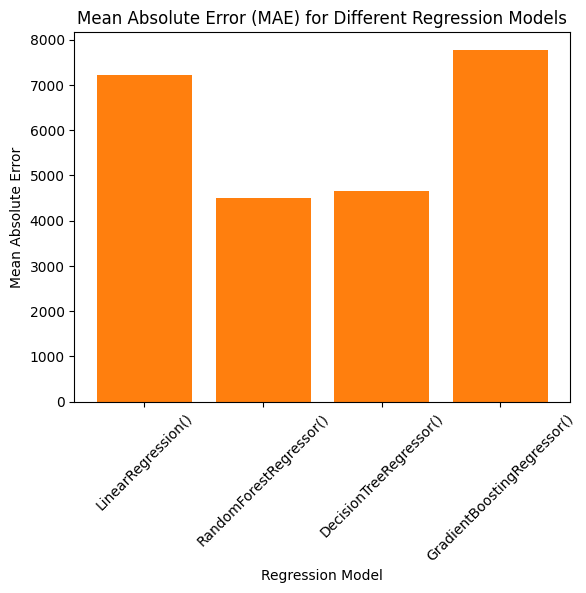

In [220]:
# Plotting MAE
plt.bar(x_indices, mae_values, color='tab:orange')
plt.title('Mean Absolute Error (MAE) for Different Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(x_indices, models, rotation=45)
plt.show()

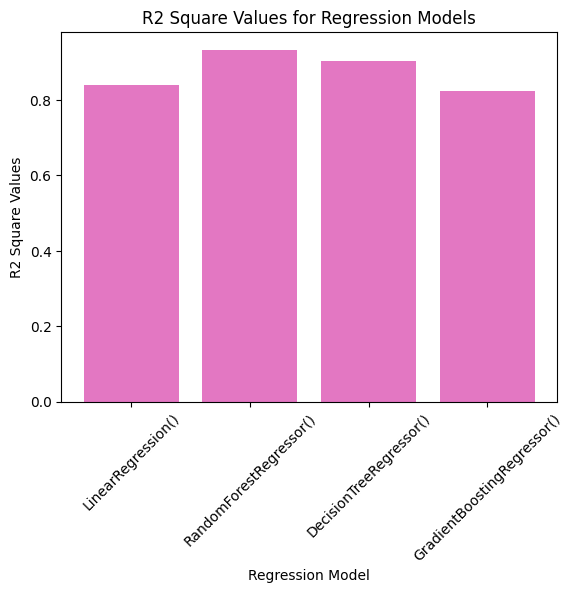

In [221]:
# Plotting MAE
plt.bar(x_indices, r2_values, color='tab:pink')
plt.title('R2 Square Values for Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('R2 Square Values')
plt.xticks(x_indices, models, rotation=45)
plt.show()

As per the MSE, RMSE, MAE, and the R2 Values, Random Forest Regressor has produced the best results. It has the least MSE, RMSE, and MAE scores and highest R2 score giving the results with least errors when compared to other models.

In [231]:
#Which category of features could give maximum salary?
columns = ['AGE', 'DESIGNATION', 'RATINGS', 'PAST EXP','Tenure']


def maxSalary(dataset, column):
    max_salary = {}
    for col in column:
        max_salary[col] = dataset.groupby(col)['SALARY'].mean().idxmax()
    return max_salary

for key, value in maxSalary(dataset, columns).items():
    print(f"{key.capitalize()}: {value}")

Age: 41.0
Designation: 5
Ratings: 4.0
Past exp: 18
Tenure: 6.4


In [232]:
#Which category of features could give maximum salary?

def minSalary(dataset, column):
    min_salary = {}
    for col in column:
        min_salary[col] = dataset.groupby(col)['SALARY'].mean().idxmin()
    return min_salary

for key, value in minSalary(dataset, columns).items():
    print(f"{key.capitalize()}: {value}")

Age: 21.0
Designation: 0
Ratings: 3.0
Past exp: 0
Tenure: 2.8


Therefore, one should have the Designation as Director and should atleast have 15+ years of experience with minimum 4 as the rating to get maximum salary. 